## Marketing and Product Performance

Name: Arathy Boban 

Organization: Entri Elevate 

Date:[Evaluation Date]

## Overview of Problem Statement

Companies often provide multiple subscription tiers(e.g, basic, premium and Standard) for their products or services. Each tier represents different pricing, features, or levels of service.Understanding which factor influence a customer's choice of subscription tier can help businesses improve their marketing strategies, optimize product offerings, and enhance customer satisfaction.

## Objective
To build a classification model to predict a customer's subscription tier based on the provided features.

## Data Description

Source: The source of the data is from Kaggle

## Features: 

1. Campaign_ID: A unique identifier for marketing campaigns.
2. Budget: Total budget allocated for a campaign.
3. Clicks: Total clicks generated by the campaign
4. Conversion: Total conversions(e.g, sales or subscriptions) resulting from the campaign.
5. Revenue_Generated: Revenue directly attributed to the campaign.
6. ROI (Return on Investment): Profitability measure derived from the campaign's revenue and budget.
7. Customer_ID: Unique identifier for customers
8. Subscription_Tier: Indicating the customer's tier(e.g., basic, premium and standard).
9. Subscription_Length: Duration of the customer's subscription(e.g.,months, years).
10. Customer_Satisfaction_Post_Refund: A measure of satisfaction after refunds.
11. Product_ID: Unique identifier for products.
12. Flash_Sale_ID: Identifier for flash sales.
13. Discount_Levels: Percentage of discount offers.
14. Units_Sold: Total units sold.
15. Bundle_ID: Identifier for product bundles.
16. Bundle_Price: Price of bundled products
17. Common_Keywords: Text data that might reveal which marketing masseges perform better.


## Data Collection

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [8]:
df = pd.read_csv('marketing_and_product_performance.csv')

In [9]:
df.head()

,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,CMP_RLSDVN,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,Premium,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable
1,CMP_JHHUE9,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,Premium,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative
2,CMP_6SBOWN,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,Basic,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable
3,CMP_Q31QCU,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,Premium,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable
4,CMP_AY0UTJ,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,Standard,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Campaign_ID                        10000 non-null  object 
 1   Product_ID                         10000 non-null  object 
 2   Budget                             10000 non-null  float64
 3   Clicks                             10000 non-null  int64  
 4   Conversions                        10000 non-null  int64  
 5   Revenue_Generated                  10000 non-null  float64
 6   ROI                                10000 non-null  float64
 7   Customer_ID                        10000 non-null  object 
 8   Subscription_Tier                  10000 non-null  object 
 9   Subscription_Length                10000 non-null  int64  
 10  Flash_Sale_ID                      10000 non-null  object 
 11  Discount_Level                     10000 non-null  int6

In [11]:
df.describe

<bound method NDFrame.describe of      Campaign_ID   Product_ID    Budget  Clicks  Conversions  \
0     CMP_RLSDVN  PROD_HBJFA3  41770.45    4946           73   
1     CMP_JHHUE9  PROD_OE8YNJ  29900.93     570          510   
2     CMP_6SBOWN  PROD_4V8A08  22367.45    3546          265   
3     CMP_Q31QCU  PROD_A1Q6ZB  29957.54    2573          781   
4     CMP_AY0UTJ  PROD_F57N66  36277.19     818           79   
...          ...          ...       ...     ...          ...   
9995  CMP_U1BQY9  PROD_F204EM  49183.07      25          720   
9996  CMP_ZQDI7T  PROD_5313XR  38519.59    3503          799   
9997  CMP_SYFTKH  PROD_44T74P  21532.92    1140          428   
9998  CMP_FTAW8H  PROD_CPN4QT  35546.54    1078          409   
9999  CMP_3L1U09  PROD_W5MSRO   7179.69    1682          935   

      Revenue_Generated   ROI  Customer_ID Subscription_Tier  \
0              15520.09  1.94  CUST_1K7G39           Premium   
1              30866.17  0.76  CUST_0DWS6F           Premium   
2    

In [12]:
df.columns

Index(['Campaign_ID', 'Product_ID', 'Budget', 'Clicks', 'Conversions',
       'Revenue_Generated', 'ROI', 'Customer_ID', 'Subscription_Tier',
       'Subscription_Length', 'Flash_Sale_ID', 'Discount_Level', 'Units_Sold',
       'Bundle_ID', 'Bundle_Price', 'Customer_Satisfaction_Post_Refund',
       'Common_Keywords'],
      dtype='object')

## Data Preprocessing - Data Cleaning

In [14]:
df.isnull().sum()

Campaign_ID                          0
Product_ID                           0
Budget                               0
Clicks                               0
Conversions                          0
Revenue_Generated                    0
ROI                                  0
Customer_ID                          0
Subscription_Tier                    0
Subscription_Length                  0
Flash_Sale_ID                        0
Discount_Level                       0
Units_Sold                           0
Bundle_ID                            0
Bundle_Price                         0
Customer_Satisfaction_Post_Refund    0
Common_Keywords                      0
dtype: int64

In [15]:
df.drop(columns=['Campaign_ID', 'Product_ID', 'Customer_ID', 'Flash_Sale_ID', 'Bundle_ID', 'Common_Keywords'], inplace=True)

In [16]:
numerical_columns = ['Budget', 'Clicks', 'Conversions', 'Revenue_Generated', 'ROI', 
                   'Subscription_Length', 'Discount_Level', 'Units_Sold', 'Customer_Satisfaction_Post_Refund']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Budget                             10000 non-null  float64
 1   Clicks                             10000 non-null  float64
 2   Conversions                        10000 non-null  float64
 3   Revenue_Generated                  10000 non-null  float64
 4   ROI                                10000 non-null  float64
 5   Subscription_Tier                  10000 non-null  object 
 6   Subscription_Length                10000 non-null  float64
 7   Discount_Level                     10000 non-null  float64
 8   Units_Sold                         10000 non-null  float64
 9   Bundle_Price                       10000 non-null  float64
 10  Customer_Satisfaction_Post_Refund  10000 non-null  float64
dtypes: float64(10), object(1)
memory usage: 859.5+ KB


## Exploratory Data Analysis (EDA)

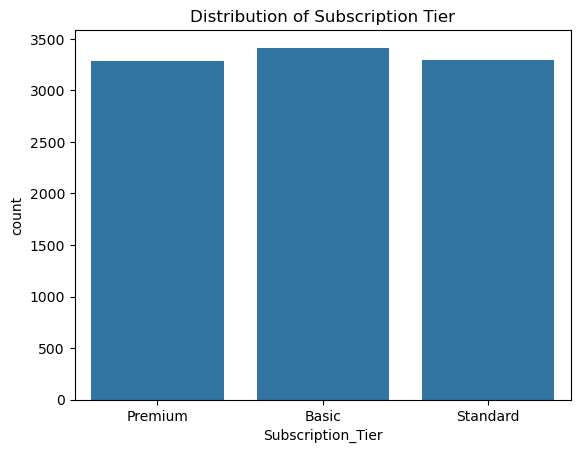

In [19]:
# Target variable distribution
sns.countplot(x='Subscription_Tier', data=df)
plt.title("Distribution of Subscription Tier")
plt.show()

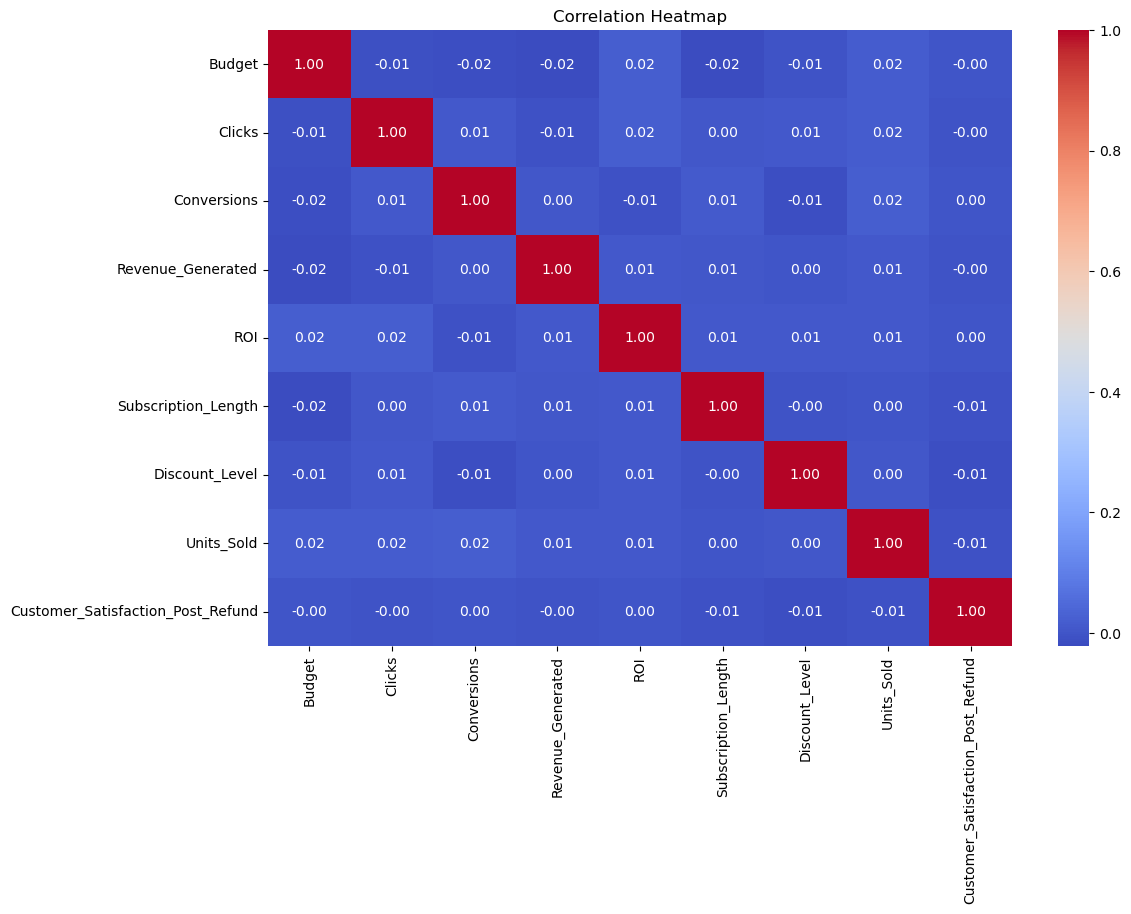

In [20]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [21]:
from scipy.stats import skew

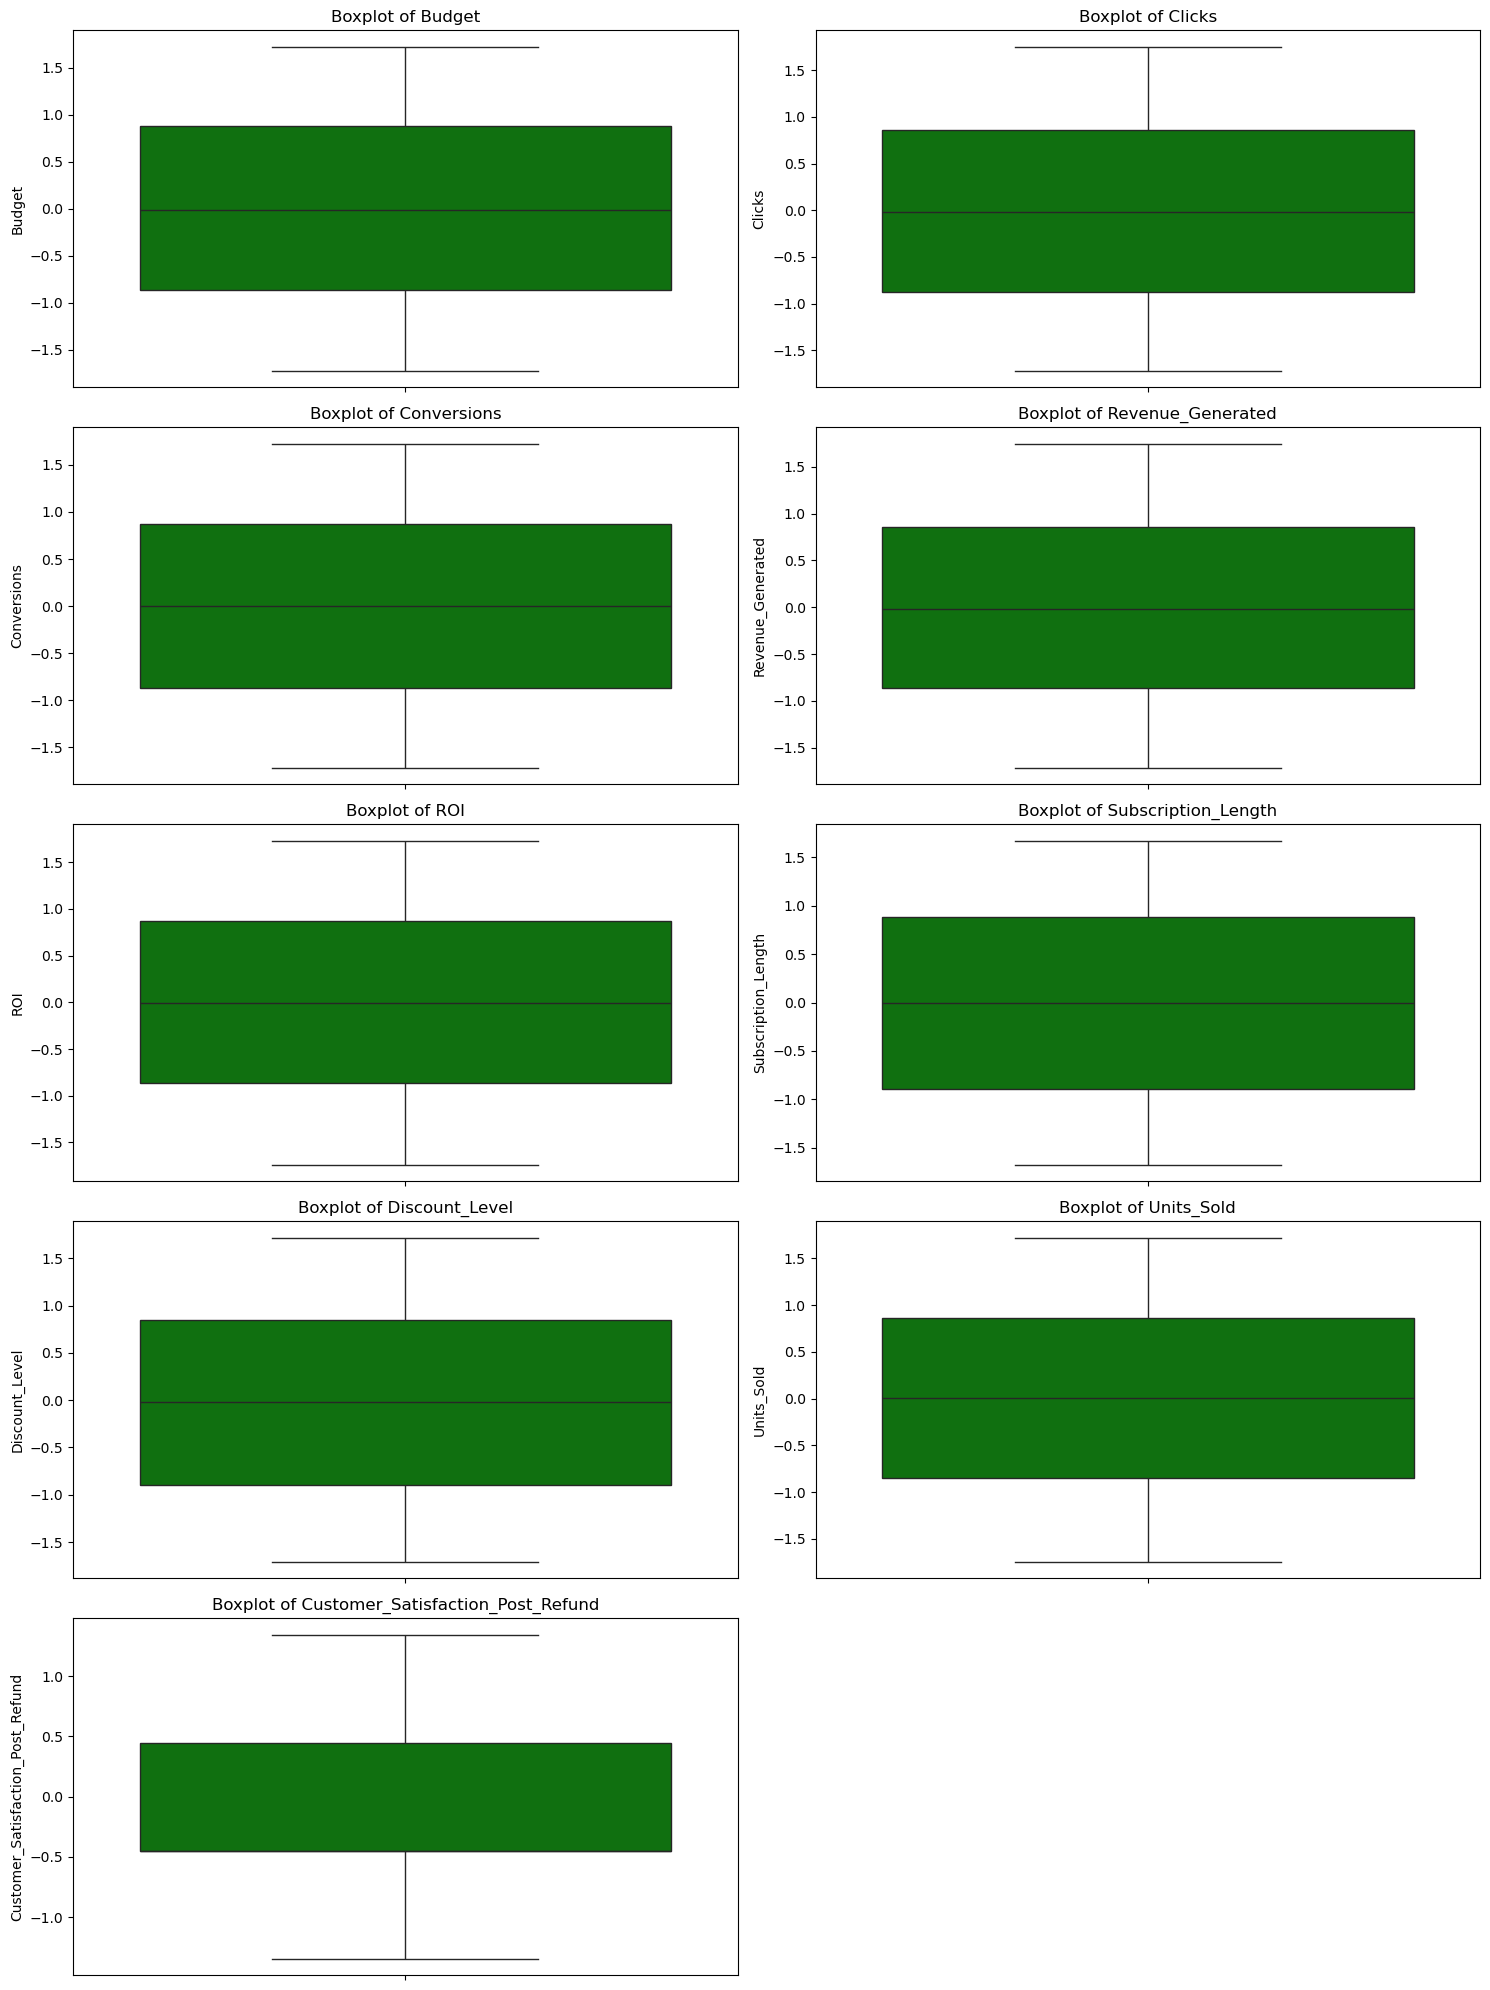

In [22]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()
for i,col in enumerate(numerical_columns):
    sns.boxplot(y=df[col], ax=axes[i], color='green')
    axes[i].set_title(f'Boxplot of {col}')

for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

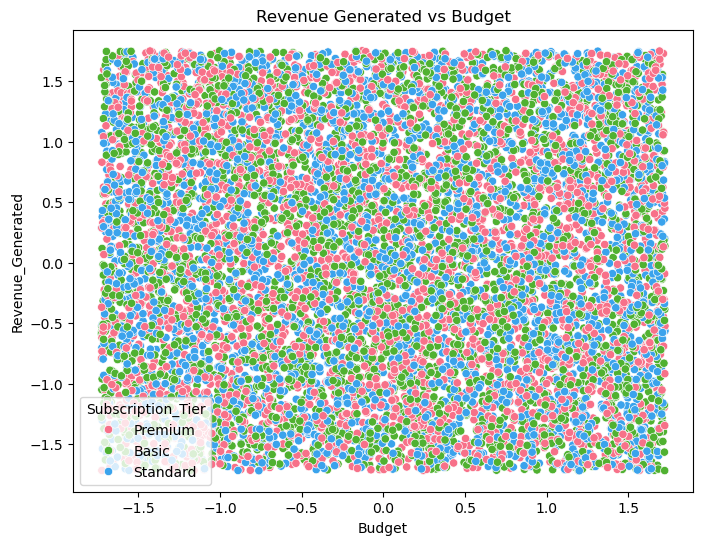

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Budget', y='Revenue_Generated', hue='Subscription_Tier', data=df, palette='husl')
plt.title("Revenue Generated vs Budget")
plt.show()

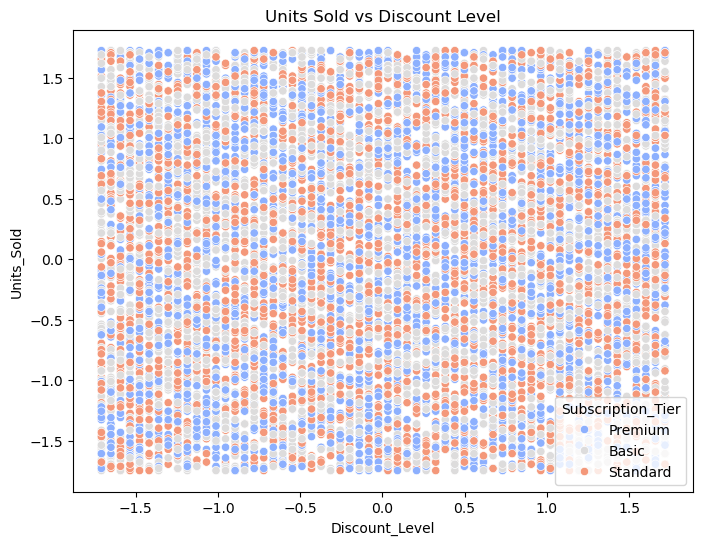

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount_Level', y='Units_Sold', hue='Subscription_Tier', data=df, palette='coolwarm')
plt.title("Units Sold vs Discount Level")
plt.show()

## Feature Engineering

In [26]:
label_encoder = LabelEncoder()
df['Subscription_Tier'] = label_encoder.fit_transform(df['Subscription_Tier'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Budget                             10000 non-null  float64
 1   Clicks                             10000 non-null  float64
 2   Conversions                        10000 non-null  float64
 3   Revenue_Generated                  10000 non-null  float64
 4   ROI                                10000 non-null  float64
 5   Subscription_Tier                  10000 non-null  int32  
 6   Subscription_Length                10000 non-null  float64
 7   Discount_Level                     10000 non-null  float64
 8   Units_Sold                         10000 non-null  float64
 9   Bundle_Price                       10000 non-null  float64
 10  Customer_Satisfaction_Post_Refund  10000 non-null  float64
dtypes: float64(10), int32(1)
memory usage: 820.4 KB


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Budget                             10000 non-null  float64
 1   Clicks                             10000 non-null  float64
 2   Conversions                        10000 non-null  float64
 3   Revenue_Generated                  10000 non-null  float64
 4   ROI                                10000 non-null  float64
 5   Subscription_Tier                  10000 non-null  int32  
 6   Subscription_Length                10000 non-null  float64
 7   Discount_Level                     10000 non-null  float64
 8   Units_Sold                         10000 non-null  float64
 9   Bundle_Price                       10000 non-null  float64
 10  Customer_Satisfaction_Post_Refund  10000 non-null  float64
dtypes: float64(10), int32(1)
memory usage: 820.4 KB


## Feature Selection

In [30]:
# Remove highly correlated features
high_corr_features = [column for column in correlation_matrix.columns
                      if any(correlation_matrix[column].abs() > 0.9) and column != 'Subscription_Tier']
df.drop(columns=high_corr_features)

,Subscription_Tier,Bundle_Price
0,1,433.80
1,1,289.29
2,0,462.87
3,1,334.16
4,2,371.67
...,...,...
9995,1,196.59
9996,2,461.12
9997,2,248.20
9998,0,217.78


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Budget                             10000 non-null  float64
 1   Clicks                             10000 non-null  float64
 2   Conversions                        10000 non-null  float64
 3   Revenue_Generated                  10000 non-null  float64
 4   ROI                                10000 non-null  float64
 5   Subscription_Tier                  10000 non-null  int32  
 6   Subscription_Length                10000 non-null  float64
 7   Discount_Level                     10000 non-null  float64
 8   Units_Sold                         10000 non-null  float64
 9   Bundle_Price                       10000 non-null  float64
 10  Customer_Satisfaction_Post_Refund  10000 non-null  float64
dtypes: float64(10), int32(1)
memory usage: 820.4 KB


In [32]:
X = df.drop(columns=['Subscription_Tier'])
y = df['Subscription_Tier']

In [33]:
from sklearn.feature_selection import SelectKBest, f_classif

In [34]:
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] =LabelEncoder().fit_transform(X[col])
    
X = pd.get_dummies(X, drop_first=True)

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
scores = scores.sort_values(by='Score', ascending=False)


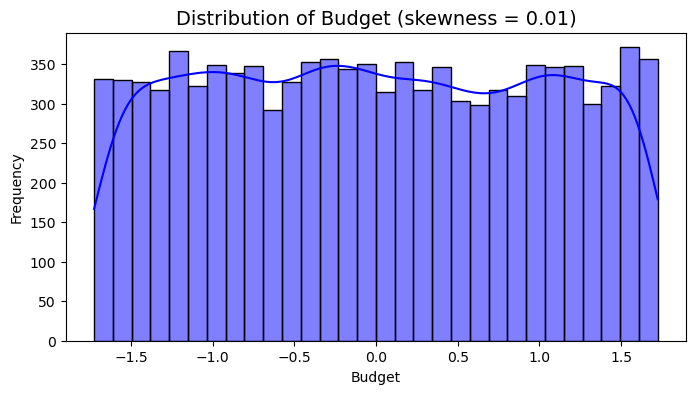

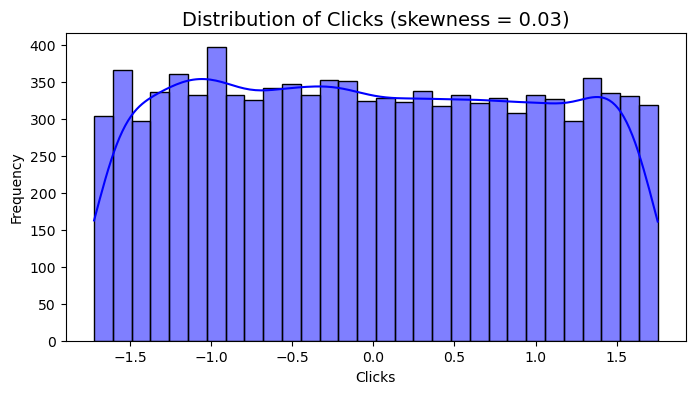

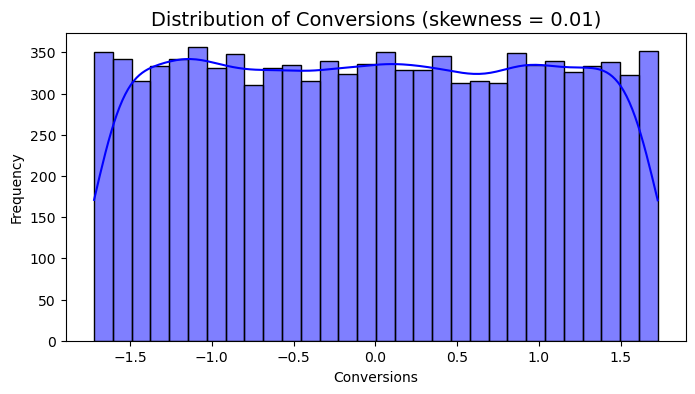

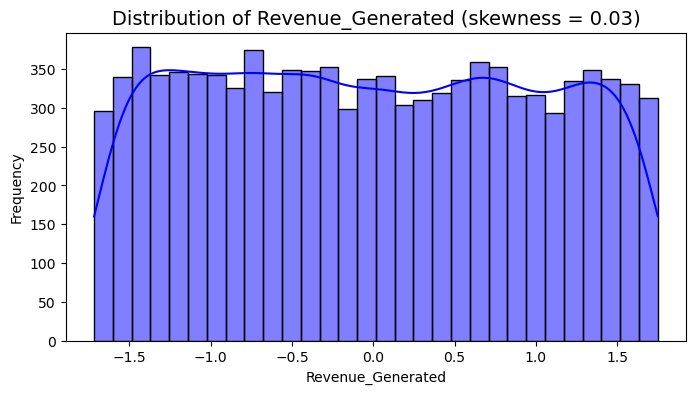

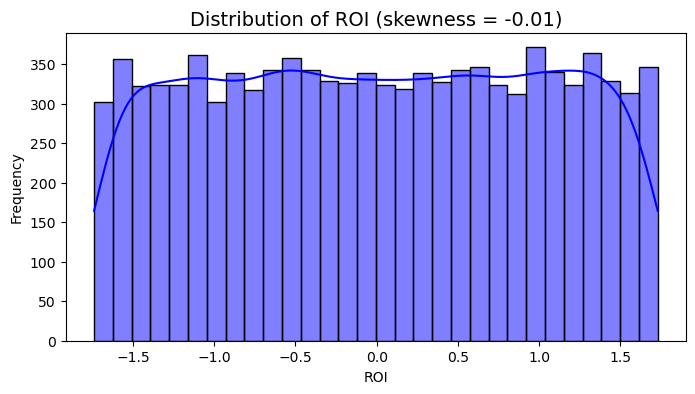

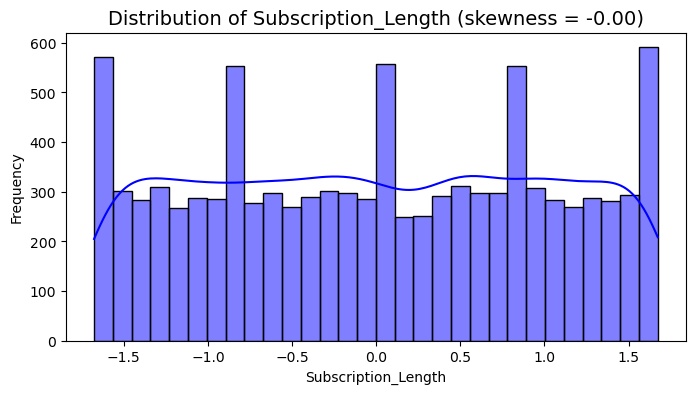

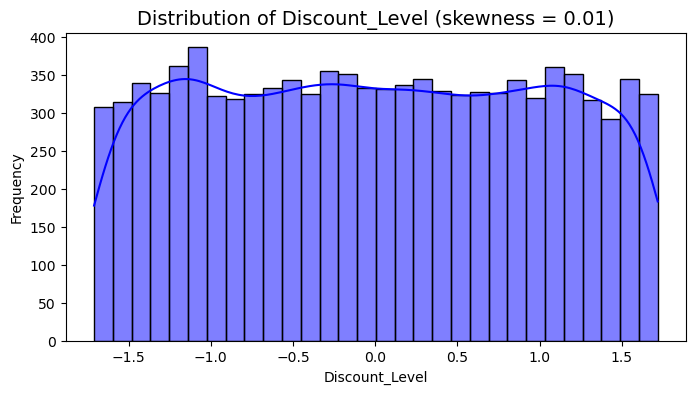

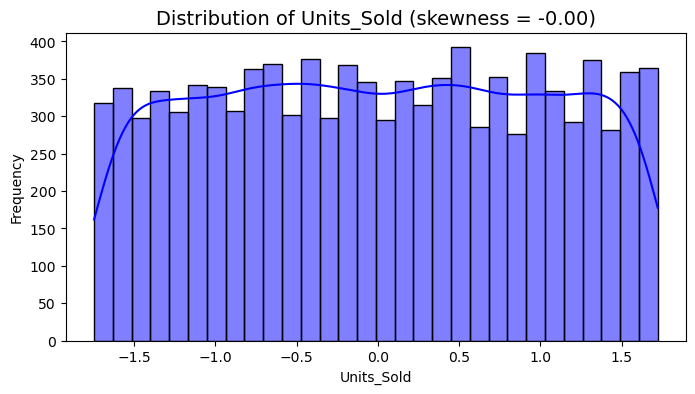

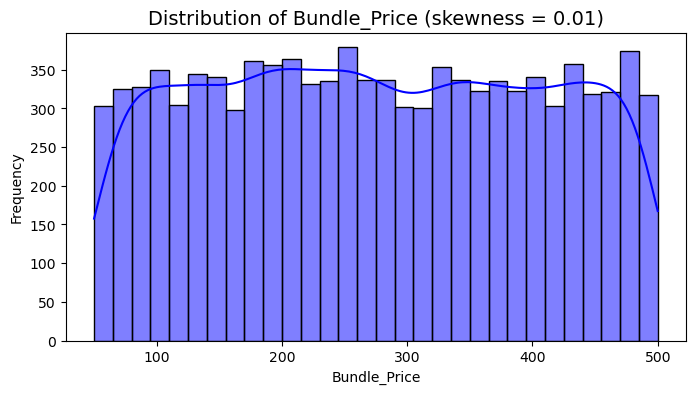

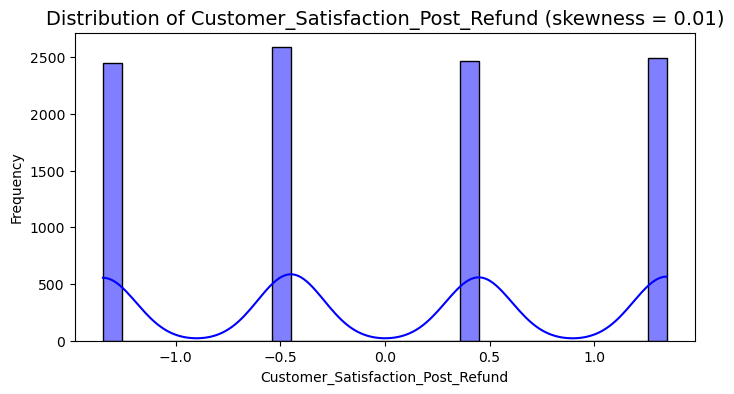

In [35]:
numerical_features = X.select_dtypes(include=["float64", "int64"]).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(X[feature], kde=True, color='blue', bins=30)
    skew_value = skew(X[feature].dropna())
    plt.title(f"Distribution of {feature} (skewness = {skew_value:.2f})", fontsize=14)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

## Split data into training and testing sets

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Feature Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Build Machine Learning Models

In [43]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [44]:
model_performance = {}
for model_name, model in models.items():
     model.fit(X_train, y_train)
     y_pred = model.predict(X_test)
     accuracy = accuracy_score(y_test, y_pred)
     model_performance[model_name] = accuracy
    
     print(f"{model_name} Accuracy: {accuracy:.4f}")
     print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Logistic Regression Accuracy: 0.3285
              precision    recall  f1-score   support

       Basic       0.33      0.55      0.41       662
     Premium       0.33      0.30      0.31       629
    Standard       0.31      0.16      0.21       709

    accuracy                           0.33      2000
   macro avg       0.32      0.33      0.31      2000
weighted avg       0.32      0.33      0.31      2000

Decision Tree Accuracy: 0.3410
              precision    recall  f1-score   support

       Basic       0.34      0.36      0.35       662
     Premium       0.32      0.34      0.33       629
    Standard       0.36      0.32      0.34       709

    accuracy                           0.34      2000
   macro avg       0.34      0.34      0.34      2000
weighted avg       0.34      0.34      0.34      2000

Random Forest Accuracy: 0.3460
              precision    recall  f1-score   support

       Basic       0.34      0.38      0.36       662
     Premium       0.33      0

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting Accuracy: 0.3200
              precision    recall  f1-score   support

       Basic       0.32      0.43      0.37       662
     Premium       0.29      0.27      0.28       629
    Standard       0.35      0.27      0.30       709

    accuracy                           0.32      2000
   macro avg       0.32      0.32      0.32      2000
weighted avg       0.32      0.32      0.32      2000



## Find the Best and Worst Model

In [46]:
best_model = max(model_performance, key=model_performance.get)
worst_model = min(model_performance, key=model_performance.get)

print(f"Best performing model: {best_model} with accuracy {model_performance[best_model]:.4f}")
print(f"Worst performing model: {worst_model} with accuracy {model_performance[worst_model]:.4f}")

Best performing model: Random Forest with accuracy 0.3460
Worst performing model: Gradient Boosting with accuracy 0.3200


## Hyperparameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV

In [95]:
param_grids = {
    'LogisticRegression': {
        'model' : LogisticRegression(max_iter=1000, random_state=42),
        'params' : {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs']}
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5]}
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth':[3, 5, 10]}
    },
    'SVM': {
        'model': SVC(random_state=42, probability=True),
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
    }
}


In [101]:
# perform Grid Search for each model
best_model = {}
for model_name, model_info in param_grids.items():
    grid_search = GridSearchCV(estimator=model_info['model'], param_grid=model_info['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best accuracy for {model_name}: {grid_search.best_score_:.2f}")



Best parameters for LogisticRegression: {'C': 10, 'solver': 'lbfgs'}
Best accuracy for LogisticRegression: 0.34
Best parameters for DecisionTree: {'max_depth': 5, 'min_samples_split': 2}
Best accuracy for DecisionTree: 0.34
Best parameters for RandomForest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy for RandomForest: 0.35
Best parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best accuracy for GradientBoosting: 0.35
Best parameters for SVM: {'C': 10, 'kernel': 'poly'}
Best accuracy for SVM: 0.34


In [103]:
print("\nTest set accuracy:")
for model_name, model in best_model.items():
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Test accuracy: {test_accuracy:.2f}")
        
    


Test set accuracy:
LogisticRegression Test accuracy: 0.33
DecisionTree Test accuracy: 0.33
RandomForest Test accuracy: 0.33
GradientBoosting Test accuracy: 0.32
SVM Test accuracy: 0.33


## Pipeline

In [105]:
from sklearn.pipeline import Pipeline
import joblib

In [109]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', RandomForestClassifier())
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', RandomForestClassifier())])

## Save the Model

In [111]:
joblib.dump(pipeline, 'classification_pipeline.pkl')

['classification_pipeline.pkl']

In [113]:
loaded_pipeline = joblib.load('classification_pipeline.pkl')

## Test with Unseen Data

In [121]:
unseen_data = pd.read_csv('capstone_unseen.csv')
unseen_data.head()

,Budget,Clicks,Conversions,Revenue_Generated,ROI,Subscription_Length,Discount_Level,Units_Sold,Bundle_Price,Customer_Satisfaction_Post_Refund
0,41770.45,4946,73,15520.09,1.94,4,43,34,433.80,4
1,29900.93,570,510,30866.17,0.76,4,28,97,289.29,2
2,22367.45,3546,265,32585.62,1.41,9,51,160,462.87,4
3,29957.54,2573,781,95740.12,3.32,32,36,159,334.16,1
4,36277.19,818,79,81990.43,3.53,29,20,52,371.67,2


In [147]:
pipeline = joblib.load('classification_pipeline.pkl')

In [153]:
unseen_data.columns

Index(['Budget', 'Clicks', 'Conversions', 'Revenue_Generated', 'ROI',
       'Subscription_Length', 'Discount_Level', 'Units_Sold', 'Bundle_Price',
       'Customer_Satisfaction_Post_Refund', 'unseen_predict'],
      dtype='object')

In [181]:
unseen_data = unseen_data.drop(columns=['unseen_predict'])

In [187]:
prediction=pipeline.predict(unseen_data)

In [163]:
unseen_data.columns

Index(['Budget', 'Clicks', 'Conversions', 'Revenue_Generated', 'ROI',
       'Subscription_Length', 'Discount_Level', 'Units_Sold', 'Bundle_Price',
       'Customer_Satisfaction_Post_Refund'],
      dtype='object')

In [177]:
predictions = pipeline.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.35      0.39      0.37       662
           1       0.32      0.33      0.32       629
           2       0.38      0.33      0.35       709

    accuracy                           0.35      2000
   macro avg       0.35      0.35      0.35      2000
weighted avg       0.35      0.35      0.35      2000



## Conclusion

The project aimed to predict the subscription tier of customers using a dataset comprising various marketing and product performance metrics. Despite extensive preprocessing and experimentation, the best model achieved an accuracy of 35 %. This outcome, while below expectations, provide several valuable insights.
1. Balanced Dataset: The target variable, Subscription_Tier, was evenly distributed across the three classes(Basic, Standard, and Premium), ensuring a fair evaluation of the model's performance.
   
2. Thorough Analysis:
   
       * Extensive feature selection, hyperparameter tuning, and the use of diverse machine learning models (Random Forest, Logistic Regression, Gradient Boosting,etc.) were employed to optimize performance.
   
       * Careful preprocessing steps, such as scaling, encoding, and balancing the dataset, ensuring that the models received clean and structured data.
   
   
4. Key Challenges:
   
       * Weak Feature-Target Relationships: The feature in the dataset showed very similar distribution across the three classes, indicating weak discriminatory power. This likely limited the model's ability to differentiate between the subscription tiers.
   
       * Noisy data: Potential noise in the dataset might have contributed to lower accuracy, as the predictive signals were overshadowed by irrelevant variations.
   
   
6. Learning Outcomes:
   
       * Model limitations: The result highlight that not all datasets are inherently suitable for achieving high predictive accuracy. This project is an excellent example of a real-world scenario where data limitations play a significant role.
   
       * Process over outcome: The project demonstrated proficiency in data preprocessing, model training, and evaluation- key components of any machine learning pipeline. These skills are crucial for tackling future, more complex problems.

## Future Work

While the model's accuracy was limited, it can still serve as a baseline for further exploration and provide insights into the dataset's structure.Although the project achieved modest accuracy, it succeed in uncovering the dataset's challenges and provided a foundation for future work. The experience gained from addressing these challenges is invaluable for building more effective predictive models in the future.